<a href="https://colab.research.google.com/github/MalikArslanBashir/Data-Science-Tasks/blob/main/Product_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from matplotlib import image as mpl_image
import tensorflow
from keras.applications.resnet50 import ResNet50
from skimage import color

In [ ]:
perfumes= pd.read_csv('/content/drive/MyDrive/Data_Science/Data ID - Sheet1.csv')
perfumes

,Product ID,image_link
0,1,https://cdn.shopify.com/s/files/1/0464/1731/39...
1,2,https://cdn.shopify.com/s/files/1/0464/1731/39...
2,3,https://cdn.shopify.com/s/files/1/0464/1731/39...
3,4,https://cdn.shopify.com/s/files/1/0464/1731/39...
4,5,https://cdn.shopify.com/s/files/1/0464/1731/39...
...,...,...
2069,2070,https://cdn.shopify.com/s/files/1/0184/5074/33...
2070,2071,https://cdn.shopify.com/s/files/1/0184/5074/33...
2071,2072,https://cdn.shopify.com/s/files/1/0184/5074/33...
2072,2073,https://cdn.shopify.com/s/files/1/0184/5074/33...


In [ ]:
perfumes.head()

,Product ID,image_link
0,1,https://cdn.shopify.com/s/files/1/0464/1731/39...
1,2,https://cdn.shopify.com/s/files/1/0464/1731/39...
2,3,https://cdn.shopify.com/s/files/1/0464/1731/39...
3,4,https://cdn.shopify.com/s/files/1/0464/1731/39...
4,5,https://cdn.shopify.com/s/files/1/0464/1731/39...


In [ ]:
perfumes.describe()

,Product ID
count,2074.000000
mean,1037.500000
std,598.856549
min,1.000000
25%,519.250000
50%,1037.500000
75%,1555.750000
max,2074.000000


In [ ]:
perfumes['Product ID'].unique()

array([   1,    2,    3, ..., 2072, 2073, 2074])

In [ ]:
perfumes.iloc[1,1]

'https://cdn.shopify.com/s/files/1/0464/1731/3955/products/LGEND100ML-MULTIc.jpg?v=1639724606'

In [ ]:
response=requests.get(perfumes.iloc[1,1])

In [ ]:
from skimage import color
def load_image(url, resized=True, reduce_to=0.1, gray=False):
  try:
    response = requests.get(url)
    path = '/content/temp_image.jpg'
    with open(path, 'wb') as f:
      f.write(response.content)
    mat_image = mpl_image.imread(path)
    if resized:
      h = int(reduce_to*mat_image.shape[0])
      w = int(reduce_to*mat_image.shape[1])
      mat_image = cv2.resize(mat_image, (w, h))
    if gray:
      mat_image = color.rgb2gray(mat_image)
  except: return None
  return mat_image

In [ ]:
import cv2
def load_sketch(url, resized=True, reduce_to=0.1):
  try:
    mat_image = load_image(url, resized=resized, reduce_to=reduce_to).mean(axis=2).round(2).astype(np.uint8)
    mat_image = cv2.Canny(mat_image, threshold1=100, threshold2=200)
  except:
    return None
  return mat_image

In [ ]:

def load_image_vector(url, resized=True, reduce_to=0.1):
  try:
    mat_image = load_sketch(url, resized=resized, reduce_to=reduce_to).ravel()
  except: return None
  return mat_image

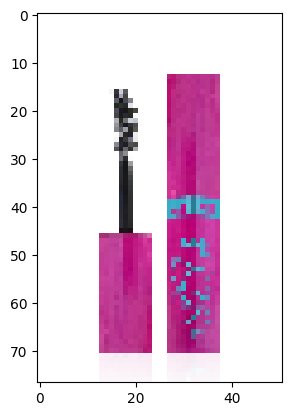

In [ ]:
url = perfumes.iloc[3, 1]
image = load_image(url, resized=True, reduce_to=0.05)
plt.imshow(image)

In [18]:
perfumes['image_array'] = perfumes.image_link.map(load_image)

In [19]:
perfumes.head()

,Product ID,image_link,image_array
0,1,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[29, 15, 16], [20, 15, 15], [37, 19, 17], [2..."
1,2,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[79, 117, 182], [80, 115, 181], [77, 115, 18..."
2,3,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[18, 20, 17], [18, 20, 17], [18, 20, 17], [1..."
3,4,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,5,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [20]:
print(type(perfumes["image_array"].iloc[0]))
print(perfumes["image_array"].iloc[0].dtype)
print(perfumes["image_array"].iloc[0].shape)


<class 'numpy.ndarray'>
uint8
(155, 103, 3)


In [21]:
num = 22
(num+(num%2))/2

11.0

In [22]:
def show_images(data, start=0, stop=9, nrows=3):
  total = stop-start
  ncols = int((total+(total%nrows))/nrows)
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
  r_counter = 0
  c_counter = 0
  for i in range(start, stop):
    axes[r_counter,c_counter].imshow(data[i])
    c_counter +=1
    if c_counter == ncols:
      r_counter +=1
      c_counter = 0
      if r_counter == nrows:
        r_counter=0

def show_images_from_list(data, list, nrows=3):
  total = len(list)
  ncols = int((total+(total%nrows))/nrows)
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
  r_counter = 0
  c_counter = 0
  for i in list:
    axes[r_counter,c_counter].imshow(data[i])
    c_counter +=1
    if c_counter == ncols:
      r_counter +=1
      c_counter = 0
      if r_counter == nrows:
        r_counter=0

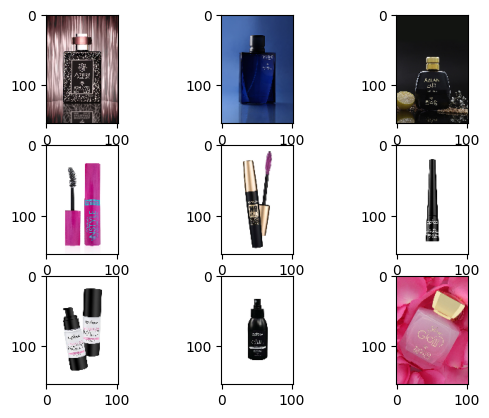

In [23]:
show_images(data=perfumes["image_array"])

In [24]:
perfumes['outline_array'] = perfumes.image_link.map(load_sketch)

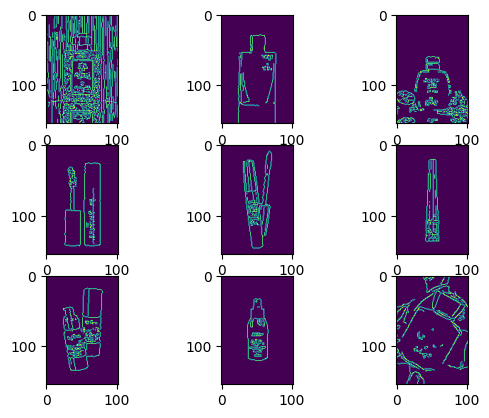

In [25]:
show_images(data=perfumes['outline_array'])

In [26]:
perfumes.head()

,Product ID,image_link,image_array,outline_array
0,1,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[29, 15, 16], [20, 15, 15], [37, 19, 17], [2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, ..."
1,2,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[79, 117, 182], [80, 115, 181], [77, 115, 18...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,3,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[18, 20, 17], [18, 20, 17], [18, 20, 17], [1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,4,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,5,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [27]:
perfumes['vector'] = perfumes.image_link.map(load_image_vector)

In [28]:
perfumes.head()

,Product ID,image_link,image_array,outline_array,vector
0,1,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[29, 15, 16], [20, 15, 15], [37, 19, 17], [2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0..."
1,2,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[79, 117, 182], [80, 115, 181], [77, 115, 18...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[18, 20, 17], [18, 20, 17], [18, 20, 17], [1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,https://cdn.shopify.com/s/files/1/0464/1731/39...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

vector1 = perfumes.vector[3]
vector2 = perfumes.vector[0]

# Reshape the vectors to be 2D arrays (required by cosine_similarity)
vector1 = vector1.reshape(1, -1)
vector2 = vector2.reshape(1, -1)

# Calculate cosine similarity
cosine_similarity_score = cosine_similarity(vector1, vector2)

# The result will be a 2D NumPy array, so you can access the similarity score as follows:
similarity = cosine_similarity_score[0][0]

# Print the cosine similarity score
print(f"Cosine Similarity: {similarity}")


Cosine Similarity: 0.11724919952904966
